# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement

To predict median house values in Californian districts, given a number of features from these districts.


## Dataset

Dataset is based on data from the 1990 California census.

It is located at `/cxldata/datasets/bootml/Housing_California_1`

# Get the data

In [ ]:
import pandas as pd
import os

DATASET_PATH = '/content'
def load_dataset_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
Housing_California = load_dataset_data()
Housing_California.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 10,Unnamed: 11
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,NaN,NaN
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,NaN,NaN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,NaN,NaN
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,NaN,NaN
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,NaN,NaN


The relevant attributes in housing.csv are :

longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value,



## Know your data

In [ ]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

Housing_California.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         3 non-null      float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.9+ MB


In [ ]:
# Find out what categories exist for the categorical fields by using the value_counts() method
# And let's drop the rows which has missing categoical value

for x in ['ocean_proximity', ]:
    Housing_California.dropna(subset=[x], how='all', inplace = True)
    print (x)
    print (Housing_California[x].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
Housing_California.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 10,Unnamed: 11
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,NaN,NaN
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,NaN,NaN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,NaN,NaN
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,NaN,NaN
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,NaN,NaN


In [ ]:
# Let's look at the numerical fields.
# The describe() method shows a summary of the numerical attributes

Housing_California.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 10,Unnamed: 11
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,0.0,3.0
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN,1.0
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN,1.0
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN,0.0
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN,0.5
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN,1.0
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN,1.5
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,NaN,2.0


The count, mean, min and max rows are self-explanatory.

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile **
2. ** 50th percentile is called median **
3. ** 75th percentile is called 3rd quartile **

## Plot histogram

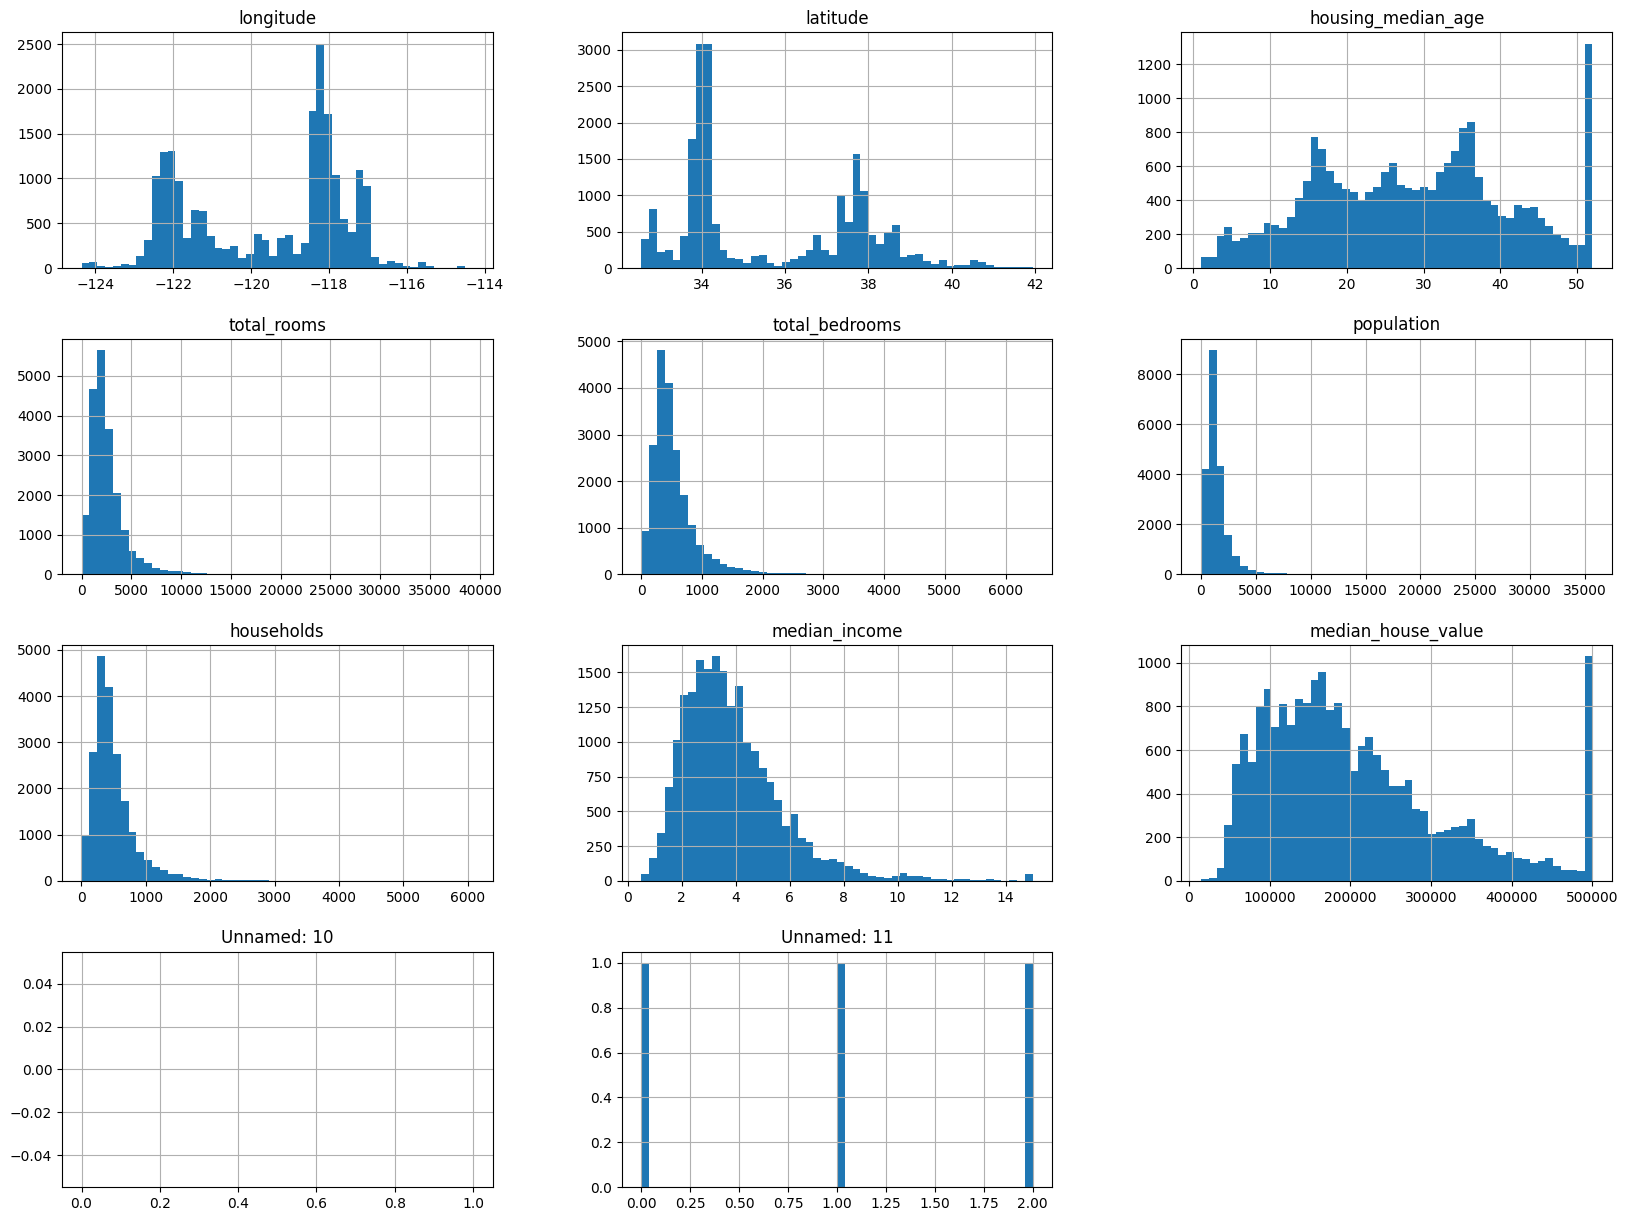

In [ ]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
Housing_California.hist(bins=50, figsize=(20,15))
plt.show()

## Split dataset into test and training set

In [ ]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [ ]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Housing_California, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 16512
Length of test set is 4128


# Stratified sampling

<Axes: >

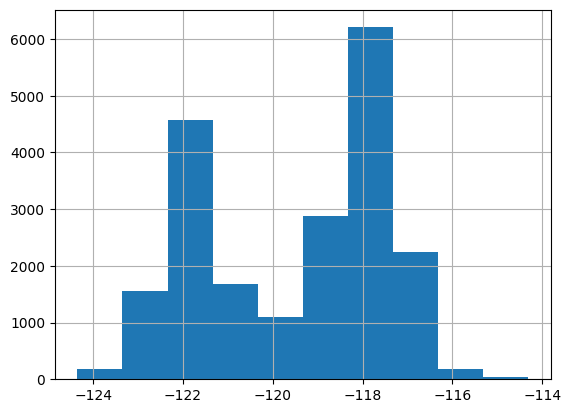

In [ ]:
# Create a histrogram of variable for stratified sampling
Housing_California['longitude'].hist()

In [ ]:
# Just check if the column selected for stratified sampling is a numerical attribute
# If it is, fix the missing values
from sklearn.impute import SimpleImputer
if "longitude" in ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value', ]:
    imp=SimpleImputer(strategy="mean")
    Housing_California["longitude"]=imp.fit_transform(Housing_California[["longitude"]]).ravel()


In [ ]:
# Divide by 1.5 to limit the number of longitude categories
# Round up using ceil to have discrete categories
Housing_California["longitude_cat"] = np.ceil(Housing_California["longitude"] / 1.5)

In [ ]:
Housing_California["longitude_cat"].value_counts()

-78.0    9698
-81.0    5478
-80.0    2465
-79.0    2111
-77.0     573
-82.0     264
-76.0      51
Name: longitude_cat, dtype: int64

In [ ]:
Housing_California["longitude_cat"].where(Housing_California["longitude_cat"] < 5, 5.0, inplace=True)


In [ ]:
Housing_California["longitude_cat"].value_counts()

-78.0    9698
-81.0    5478
-80.0    2465
-79.0    2111
-77.0     573
-82.0     264
-76.0      51
Name: longitude_cat, dtype: int64

<Axes: >

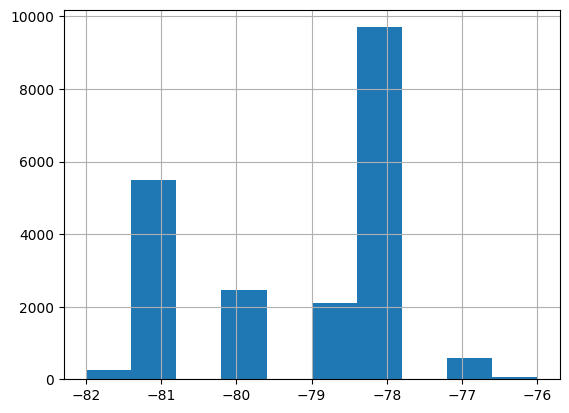

In [ ]:
Housing_California["longitude_cat"].hist()

In [ ]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Housing_California, Housing_California["longitude_cat"]):
    strat_train_set = Housing_California.iloc[train_index]
    strat_test_set = Housing_California.iloc[test_index]

In [ ]:
# longitude category proportion in test set generated with stratified sampling
strat_test_set["longitude_cat"].value_counts() / len(strat_test_set)

-78.0    0.469961
-81.0    0.265262
-80.0    0.119428
-79.0    0.102229
-77.0    0.027859
-82.0    0.012839
-76.0    0.002422
Name: longitude_cat, dtype: float64

In [ ]:
# longitude category proportion in full dataset

Housing_California["longitude_cat"].value_counts() / len(Housing_California)

-78.0    0.469864
-81.0    0.265407
-80.0    0.119428
-79.0    0.102277
-77.0    0.027762
-82.0    0.012791
-76.0    0.002471
Name: longitude_cat, dtype: float64

In [ ]:
# Let’s compare longitude category proportion in Stratified Sampling and Random Sampling

def longitude_cat_proportions(data):
    return data["longitude_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(Housing_California, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": longitude_cat_proportions(Housing_California),
    "Stratified": longitude_cat_proportions(strat_test_set),
    "Random": longitude_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
-82.0,0.012791,0.012839,0.010417,-18.560606,0.378788
-81.0,0.265407,0.265262,0.256541,-3.340635,-0.054765
-80.0,0.119428,0.119428,0.117248,-1.825558,0.000000
-79.0,0.102277,0.102229,0.107558,5.163430,-0.047371
-78.0,0.469864,0.469961,0.474322,0.948649,0.020623
-77.0,0.027762,0.027859,0.031492,13.438045,0.349040
-76.0,0.002471,0.002422,0.002422,-1.960784,-1.960784


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("longitude_cat", axis=1, inplace=True)

<ipython-input-151-d280bf4b65b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("longitude_cat", axis=1, inplace=True)
<ipython-input-151-d280bf4b65b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("longitude_cat", axis=1, inplace=True)


In [ ]:
Housing_California = strat_train_set.copy()
test_set = strat_test_set.copy()
train_set = strat_train_set.copy()

# Discover and visualize the data to gain insights

<Axes: xlabel='longitude', ylabel='longitude'>

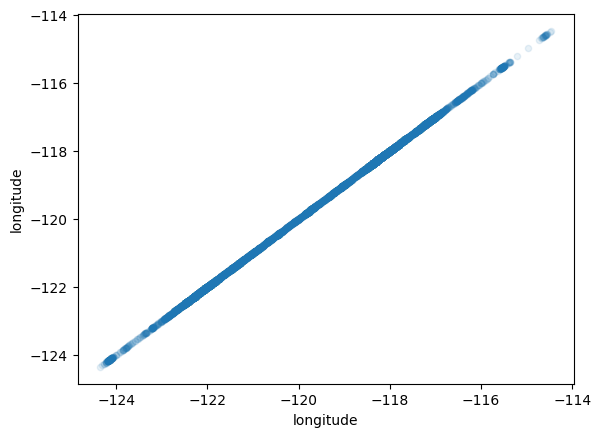

In [ ]:
Housing_California.plot(kind="scatter", x="longitude", y="longitude", alpha=0.1)

# Generate correlations

<ipython-input-154-d5b13e54be29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Housing_California.corr()
<ipython-input-154-d5b13e54be29>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Housing_California.corr(), annot = True )


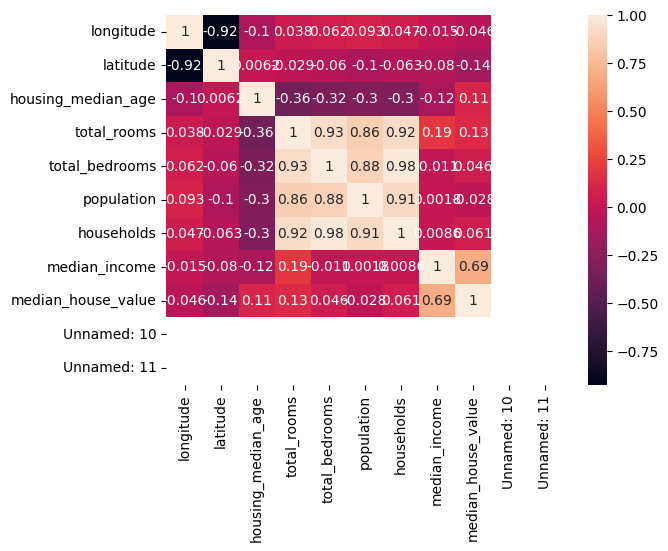

In [ ]:
import seaborn as sns
corr_matrix = Housing_California.corr()
corr_matrix
sns.heatmap(Housing_California.corr(), annot = True )
plt.show()


In [ ]:
for x in ['median_house_value', ]:
    print (corr_matrix[x])

longitude            -0.045663
latitude             -0.144230
housing_median_age    0.108402
total_rooms           0.130456
total_bedrooms        0.045517
population           -0.027739
households            0.061253
median_income         0.687559
median_house_value    1.000000
Unnamed: 10                NaN
Unnamed: 11                NaN
Name: median_house_value, dtype: float64


In [ ]:
for x in ['median_house_value', ]:
    print (corr_matrix[x].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687559
total_rooms           0.130456
housing_median_age    0.108402
households            0.061253
total_bedrooms        0.045517
population           -0.027739
longitude            -0.045663
latitude             -0.144230
Unnamed: 10                NaN
Unnamed: 11                NaN
Name: median_house_value, dtype: float64


# Generate scatter matrix

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

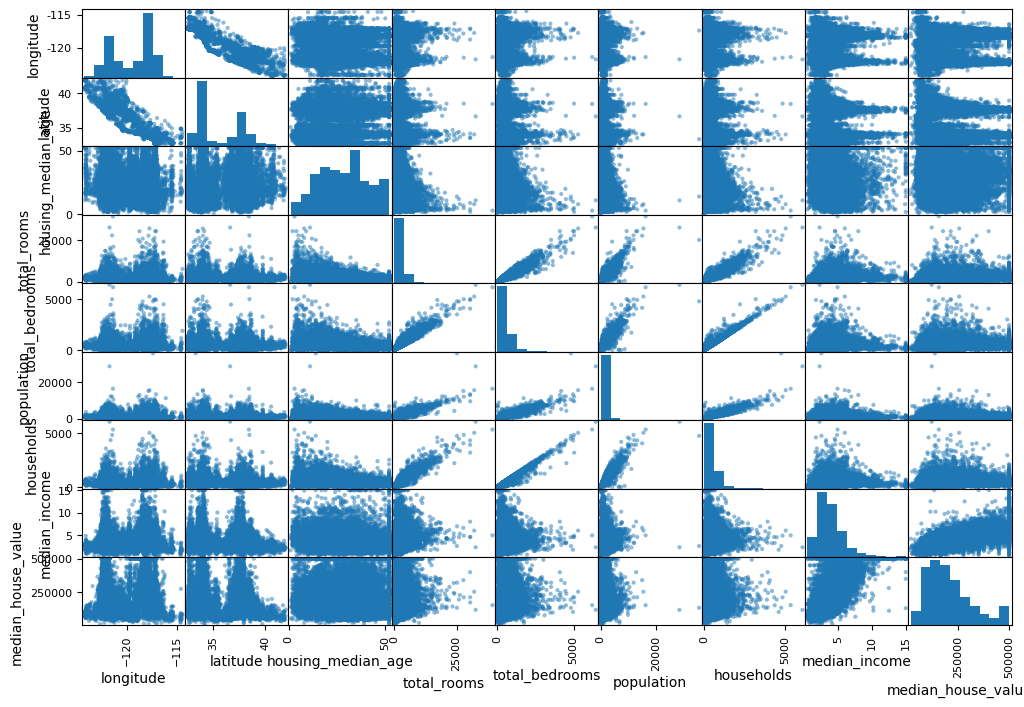

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# Decrease the number of numerical attributes in the for loop below to get a clear picture in the matrices

from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value', ]:
    attributes.append(x)
scatter_matrix(Housing_California[attributes], figsize=(12, 8))

In [ ]:
Housing_California.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 10,Unnamed: 11
count,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000,16512.000000,16512.000000,16512.00000,0.0,1.0
mean,-119.568819,35.636579,28.635114,2628.892684,536.374587,1425.641715,498.829881,3.869100,206526.19719,NaN,1.0
std,2.003089,2.137917,12.612276,2170.206005,418.635744,1142.178063,381.114820,1.910117,115321.69200,NaN,NaN
min,-124.350000,32.550000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.00000,NaN,1.0
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,786.750000,279.000000,2.556200,119000.00000,NaN,1.0
50%,-118.490000,34.260000,29.000000,2125.000000,434.000000,1164.000000,408.500000,3.528800,179600.00000,NaN,1.0
75%,-118.010000,37.720000,37.000000,3141.000000,647.000000,1725.000000,605.000000,4.744000,264600.00000,NaN,1.0
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.00000,NaN,1.0


# Prepare the data for Machine Learning algorithms

In [ ]:
# Let’s revert to a clean training set

x = 0
for x in ['median_house_value', ]:
    Housing_California = train_set.drop(x, axis=1) # drop label for training set
    Housing_California_labels = train_set[x].copy()

# Note drop() creates a copy of the data and does not affect train_set

In [ ]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = Housing_California[Housing_California.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Unnamed: 10,Unnamed: 11
1197,-121.65,39.32,40,812,154.0,374,142,2.7891,INLAND,NaN,NaN
19603,-121.04,37.60,27,958,184.0,580,177,2.1875,INLAND,NaN,NaN
890,-121.93,37.54,25,1354,192.0,596,220,6.6290,<1H OCEAN,NaN,NaN
8127,-118.16,33.80,9,3564,835.0,1530,807,5.1806,NEAR OCEAN,NaN,NaN
9409,-122.53,37.89,35,4127,689.0,1596,707,5.9073,NEAR BAY,NaN,NaN


In [ ]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Remove the text attributes because Imputer works on numerical attributes

Housing_California_num = Housing_California
for x in ['ocean_proximity', ]:
    Housing_California_num = Housing_California_num.drop(x, axis=1)

Now let's preprocess the categorical fields

In [ ]:
# Convert categorical fields to numbers
cat_variables = []
for x in ['ocean_proximity', ]:
    cat_variables.append(x)
Housing_California_cat = Housing_California[cat_variables]

In [ ]:
Housing_California_cat.head(10)

,ocean_proximity
1197,INLAND
19603,INLAND
890,<1H OCEAN
8127,NEAR OCEAN
9409,NEAR BAY
2757,INLAND
5627,NEAR OCEAN
9090,INLAND
12431,INLAND
11428,<1H OCEAN


In [ ]:
# Definition of the CategoricalEncoder class

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.pipeline import Pipeline
cat_attribs = list(Housing_California_cat)
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])


## Feature scaling

In [ ]:
# Use Scikit-Learn standard_scaling
num_variables_standardization = []
for x in ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income', ]:
    num_variables_standardization.append(x)
Housing_California_num_standardization = Housing_California_num[num_variables_standardization]
Housing_California_num_standardization.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1197,-121.65,39.32,40,812,154.0,374,142,2.7891
19603,-121.04,37.60,27,958,184.0,580,177,2.1875
890,-121.93,37.54,25,1354,192.0,596,220,6.6290
8127,-118.16,33.80,9,3564,835.0,1530,807,5.1806
9409,-122.53,37.89,35,4127,689.0,1596,707,5.9073


In [ ]:
# Building a pipeline for preprocessing the numerical attributes for StandardScaler:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs_standard = list(Housing_California_num_standardization)
num_pipeline_standard = Pipeline([
    ('selector', DataFrameSelector(num_attribs_standard)),
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
])


In [ ]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_standard", num_pipeline_standard),
    ("cat_pipeline", cat_pipeline),
])


In [ ]:
Housing_California.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Unnamed: 10,Unnamed: 11
1197,-121.65,39.32,40,812,154.0,374,142,2.7891,INLAND,NaN,NaN
19603,-121.04,37.60,27,958,184.0,580,177,2.1875,INLAND,NaN,NaN
890,-121.93,37.54,25,1354,192.0,596,220,6.6290,<1H OCEAN,NaN,NaN
8127,-118.16,33.80,9,3564,835.0,1530,807,5.1806,NEAR OCEAN,NaN,NaN
9409,-122.53,37.89,35,4127,689.0,1596,707,5.9073,NEAR BAY,NaN,NaN


In [ ]:
Housing_California_prepared = full_pipeline.fit_transform(Housing_California)
print(Housing_California_prepared[0])
print(Housing_California_prepared[1])
print(Housing_California_prepared[2])

[-1.03901745  1.72295371  0.90112446 -0.83722361 -0.9180368  -0.92076148
 -0.93630756 -0.56542773  0.          1.          0.          0.
  0.        ]
[-0.73447851  0.91840795 -0.12964856 -0.76994685 -0.8460103  -0.74039885
 -0.84446894 -0.88039182  0.          1.          0.          0.
  0.        ]
[-1.17880582  0.8903424  -0.28822902 -0.58747017 -0.82680323 -0.7263901
 -0.73163863  1.44492905  1.          0.          0.          0.
  0.        ]


<ipython-input-166-431c27960bcb>:109: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
<ipython-input-166-431c27960bcb>:144: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
<ipython-input-166-431c27960bcb>:146: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will 

In [ ]:
Housing_California_prepared.shape

(16512, 13)

# Select and train a model

In [ ]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [ ]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Housing_California_prepared, Housing_California_labels)

LinearRegression()

In [ ]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Housing_California_predictions = lin_reg.predict(Housing_California_prepared)
lin_mse = mean_squared_error(Housing_California_labels, Housing_California_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68845.93442679662

In [ ]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, Housing_California_prepared, Housing_California_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71336.44707232 68207.84927171 66906.002129   71429.09937632
 66525.65288007 72570.75619643 72285.6622243  66627.18953235
 66223.56932955 67845.6358616 ]
Mean: 68995.78638736303
Standard deviation: 2463.9659920583995


In [ ]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Housing_California_predictions = lin_reg.predict(Housing_California_prepared)
lin_mse = mean_squared_error(Housing_California_labels, Housing_California_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68845.93442679662

In [ ]:
# Calculate the R_square in Linear Regression Model

from sklearn.metrics import r2_score
r2_score(Housing_California_labels, Housing_California_predictions)

0.643580965986841

In [ ]:
# Fiding Residual Sum of Squares value
df = pd.DataFrame({'Actual': Housing_California_labels, 'Predicted':Housing_California_predictions})

print(' residual sum of squares is : '+ str(np.sum(np.square(df['Actual'] - df['Predicted']))))
print(' total sum of squares is : '+ str(np.sum(np.square(df['Actual'] - np.mean(df['Actual'])))))

 residual sum of squares is : 78262961489375.05
 total sum of squares is : 219581318674707.97


In [ ]:
# Finding the Linear Regression coefficients
print('Model parameters')
print(f"slope: {lin_reg.coef_}")
print("Intercept:",lin_reg.intercept_)


Model parameters
slope: [-53274.11840001 -53843.38716141  13474.80456036 -11054.89844862
  30804.44345628 -43113.75681611  28111.25982708  73822.39125835
 -23478.20346255 -62707.86808226 132747.08633808 -28266.5514854
 -18294.46330787]
Intercept: 242376.2238852568


In [ ]:
# Finding the R-squared value
RSS=np.sum(np.square(df['Actual'] - df['Predicted']))  # Residual Sum of Squares
TSS=np.sum(np.square(df['Actual'] - np.mean(df['Actual']))) # Total Sum of Squares
rs=1-(RSS/TSS) # R-squared
rs

0.643580965986841

In [ ]:
# Finding the Residual Squared Error
residuals=df['Actual'] - df['Predicted']
n=len(df['Actual'])
p = 1  #  one predictor
RSE = np.sqrt(np.sum(residuals**2) / (n - p - 1))
RSE

68850.1042541483

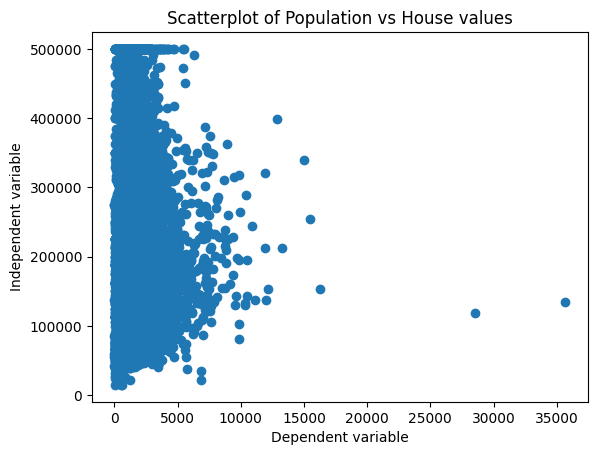

In [ ]:
#Linearity Assumption

x=Housing_California['population']
y=df['Actual']
plt.scatter(x,y)
plt.xlabel('Dependent variable')
plt.ylabel('Independent variable')
plt.title('Scatterplot of Population vs House values')
plt.show()

In [ ]:
# Checking Independence of Residuals

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy import stats

residuals = sm.OLS(y, sm.add_constant(Housing_California_prepared)).fit().resid
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 2.009220003281479


In [ ]:
# Normality: Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print("Mean-value:", shapiro_test.pvalue)

Mean-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Homoscedasticity: Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(Housing_California_prepared))
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 7.420669941623199e-133


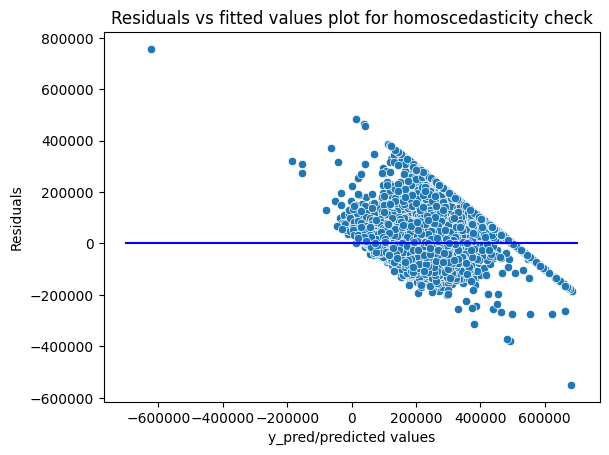

In [ ]:
residuals = df['Actual'] - df['Predicted']
# p = sns.scatterplot(df['Predicted'],residuals)
sns.scatterplot(x=df['Predicted'],y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-10,10)
# plt.xlim(0,26)
p = sns.lineplot(x=[-700000,700000],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<ipython-input-196-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


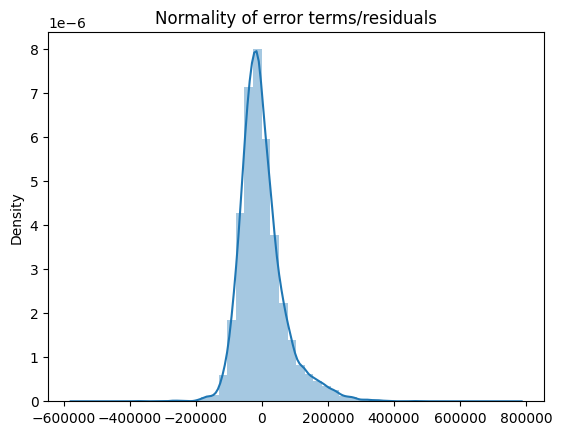

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

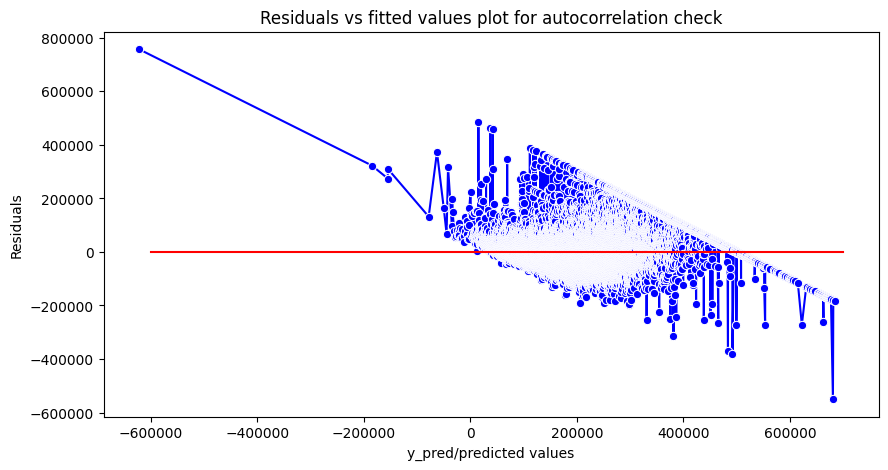

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=df['Predicted'],y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[-600000,700000],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')